# Loading packages

In [1]:
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Creating dataset

In [2]:
X, y = datasets.make_blobs(n_samples=1500,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)

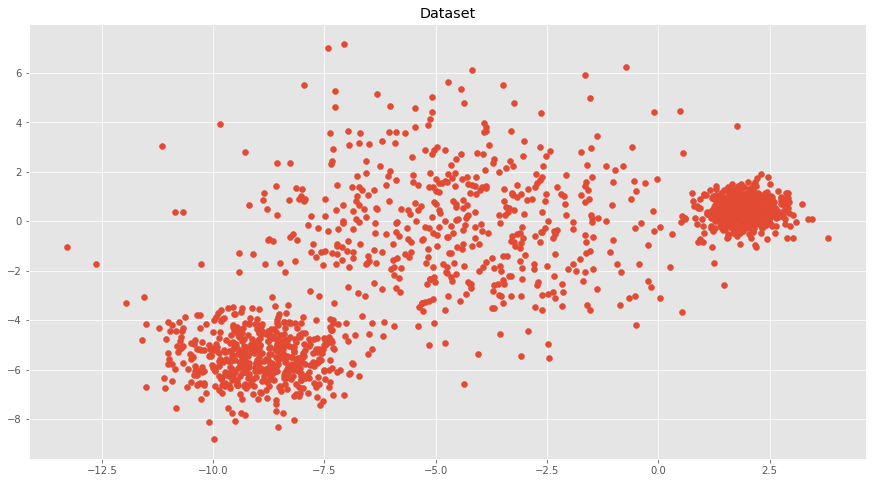

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1])
plt.title("Dataset")
plt.show()

# Functions

In [4]:
def prob_X(X, model):

  N = model.n_components
  X_prob = np.zeros((len(X),1))

  for j in range(len(X)):
    likelihoods = np.zeros((N,1))
    for i in range(N):
      likelihoods[i] = multivariate_normal.pdf(X[j], mean=model.means_[i], cov=model.covariances_[i,:,:])

    X_prob[j] = np.dot(likelihoods.T, model.weights_.reshape(-1,1))[0,0]

  return X_prob

# **Implementation of Gaussian Mixture models**

> # With **2 clusters**

In [5]:
gm = GaussianMixture(n_components=2, random_state=0)

In [6]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

> # Predict the cluster

In [7]:
gm.predict(X)

array([1, 1, 0, ..., 1, 1, 1])

In [8]:
gm.predict_proba(X)

array([[1.01729221e-11, 1.00000000e+00],
       [6.67799555e-09, 9.99999993e-01],
       [9.99982115e-01, 1.78845174e-05],
       ...,
       [5.53003971e-27, 1.00000000e+00],
       [9.23075599e-26, 1.00000000e+00],
       [4.23712430e-29, 1.00000000e+00]])

> # View Parameters

In [9]:
gm.means_

array([[-8.90854128, -5.45657118],
       [-1.23348273,  0.23876284]])

In [10]:
gm.covariances_

array([[[ 1.13620363,  0.02800732],
        [ 0.02800732,  0.97197133]],

       [[13.25157207,  0.5448418 ],
        [ 0.5448418 ,  2.70828311]]])

In [11]:
gm.weights_

array([0.33957872, 0.66042128])

> # Calculate P(X)

In [12]:
prob_X(X, gm)

array([[0.0048978 ],
       [0.00341124],
       [0.0011375 ],
       ...,
       [0.01214816],
       [0.0148619 ],
       [0.01209878]])

# Visualizing dataset

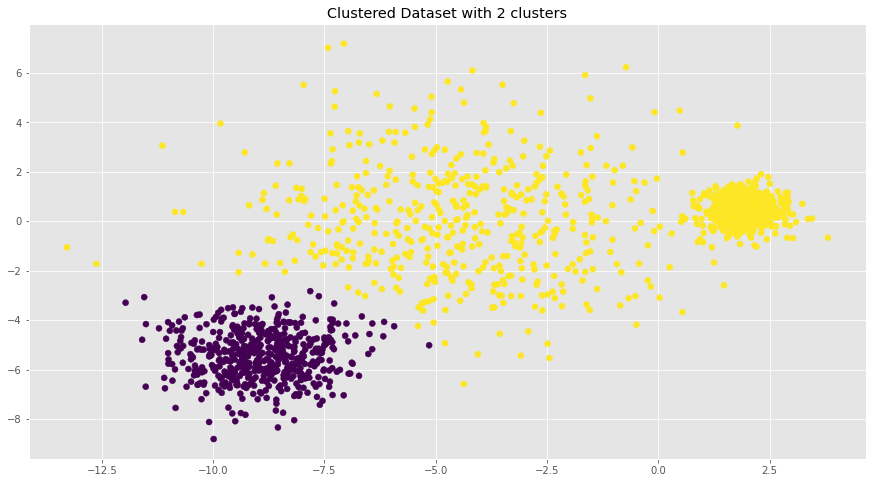

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.title(f"Clustered Dataset with {gm.n_components} clusters")
plt.show()

> # With **3 clusters**

In [14]:
gm = GaussianMixture(n_components=3, random_state=0)

In [15]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

> # Predict the cluster

In [16]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [17]:
gm.predict_proba(X)

array([[8.23261068e-013, 5.93858015e-061, 1.00000000e+000],
       [1.37630525e-009, 1.56484543e-082, 9.99999999e-001],
       [9.97564718e-001, 1.09549628e-203, 2.43528163e-003],
       ...,
       [1.32949568e-031, 9.94458372e-001, 5.54162826e-003],
       [2.68374773e-029, 9.34469404e-001, 6.55305956e-002],
       [2.08396627e-034, 9.98360072e-001, 1.63992824e-003]])

> # View Parameters

In [18]:
gm.means_

array([[-8.95577131, -5.48509192],
       [ 1.92228999,  0.45614336],
       [-4.49503928, -0.09394217]])

In [19]:
gm.covariances_

array([[[ 1.02267848e+00, -1.40842473e-02],
        [-1.40842473e-02,  9.38863935e-01]],

       [[ 2.31830343e-01,  6.14036899e-03],
        [ 6.14036899e-03,  2.42786828e-01]],

       [[ 6.23130532e+00, -1.39207356e-02],
        [-1.39207356e-02,  5.48329133e+00]]])

In [20]:
gm.weights_

array([0.33091445, 0.33213049, 0.33695505])

> # Calculate P(X)

In [21]:
prob_X(X, gm)

array([[0.00595603],
       [0.00406407],
       [0.0009097 ],
       ...,
       [0.07993475],
       [0.01418141],
       [0.20509607]])

# Visualizing dataset

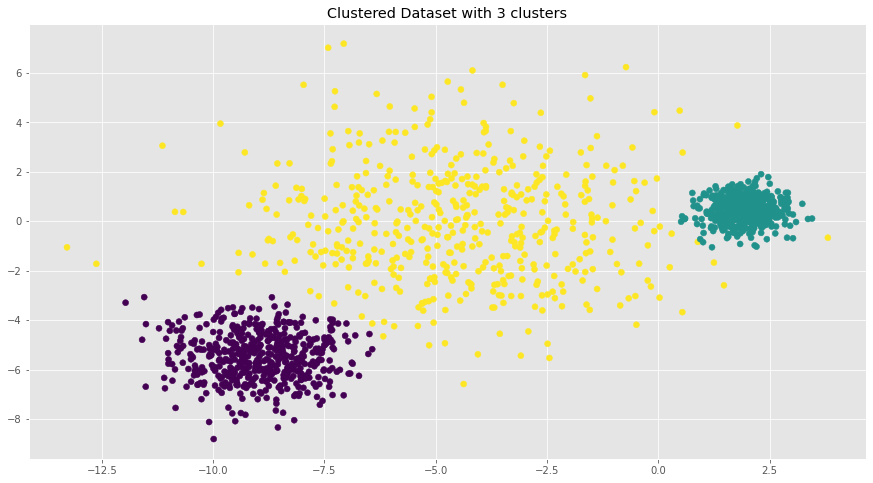

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.title(f"Clustered Dataset with {gm.n_components} clusters")
plt.show()